   # Titanic Machine Learning from Disaster
![alt text](stower_titanic.jpg)

## Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.This data science project will give you introdcution on how to use Python to apply various machine learning techniques  to the RMS Titanic dataset and predict which passenger would have survived the tragedy.

### The Data

The dataset consists of 11 predictor variables and a binary target variable "survived". The features include assengerId
* Pclass
* Name
* Sex
* Age
* SibSp
* Parch
* Ticket
* Fare
* Cabin
* Embarked

There are 891 records of passengers, out of which 342 survied and 549 who did not survive.


In [1]:
import pandas as pd
from pandas import Series,DataFrame 

import matplotlib.pyplot as plt
%pylab inline

import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load the dataset
titanic_df=pd.read_csv("train.csv")
#Fetch the top head rows
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Analyze
* We know that women and children were more likely to survive. Thus Age, sex are probably good predictors
* Its also logical to think that passenger class might affect the outcome, as first class were closer to the deck of the ship
* Fare is highly tied to passenger class, and will probably be highly corelated with it,might add some additional information
* Number of siblings and parents/children will probably be corealted with survival one way or the other, as either there are 
* more people to help you, or more people to think about you and trying to save



### Statistical summary 

In [3]:
# Describe on every variable
# statistical summary on an id does not make sense
# Pclass should be treated as categorical variable
# age is important. Mean age is 29
# minimum is .4
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Imputation


In [4]:
#Age
Age_median=titanic_df['Age'].median()
titanic_df["Age"]=titanic_df["Age"].fillna(Age_median)
#Embark
titanic_df["Embarked"].fillna('S',inplace=True) #C = Cherbourg, Q = Queenstown, S = Southampton
titanic_df.loc[titanic_df["Embarked"] == "S", "Embarked"] = 0
titanic_df.loc[titanic_df["Embarked"] == "C", "Embarked"] = 1
titanic_df.loc[titanic_df["Embarked"] == "Q", "Embarked"] = 2
#Sex
titanic_df.loc[titanic_df['Sex'] == 'male','Sex'] = 0
titanic_df.loc[titanic_df['Sex'] == 'female','Sex'] = 1

### Data Exploration
Visuallization

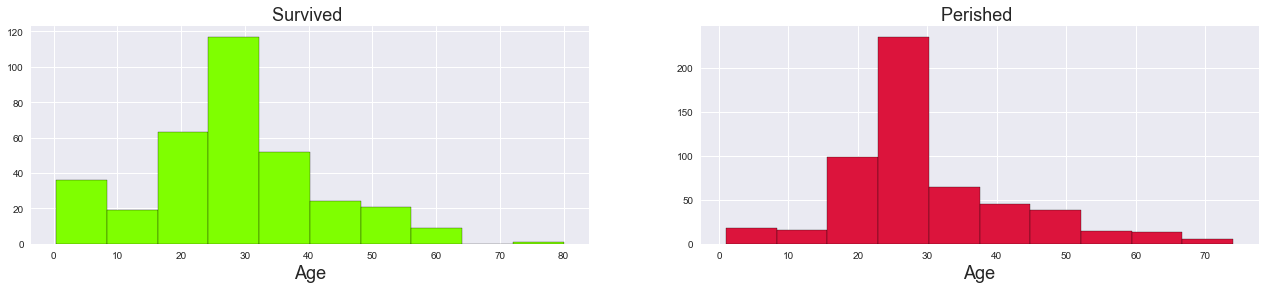

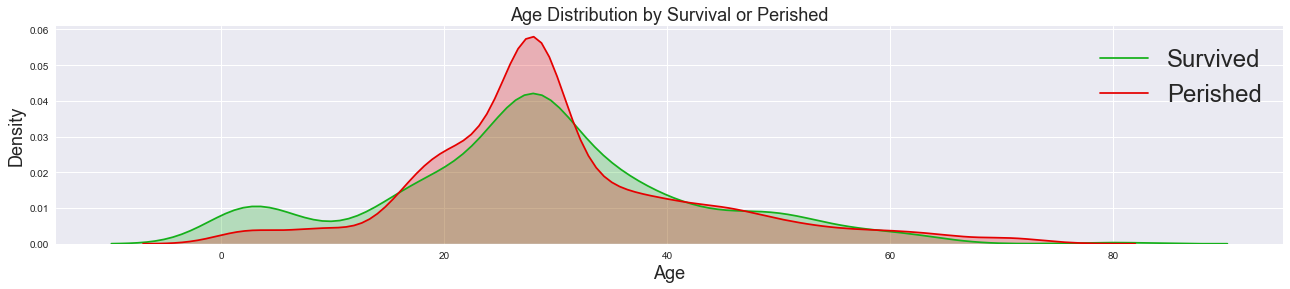

In [5]:
#pair_plot = sns.pairplot(titanic_df.iloc[:, :-1])

#Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(titanic_df.loc[titanic_df['Survived'] == 1, "Age"], color = 'chartreuse', edgecolor='black')
ax[0].set_title('Survived ', fontsize = 18)
ax[0].set_xlabel('Age', fontsize = 18)
ax[1].hist(titanic_df.loc[titanic_df['Survived'] == 0, "Age"], color = 'crimson', edgecolor='black')
ax[1].set_title('Perished ', fontsize = 18)
ax[1].set_xlabel('Age', fontsize = 18)

# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 1, "Age"], shade=True, color=sns.xkcd_rgb["green"], label="Survived")
ax = sns.kdeplot(titanic_df.loc[titanic_df['Survived'] == 0, "Age"], shade=True, color=sns.xkcd_rgb["red"], label="Perished")
ax.set_title('Age Distribution by Survival or Perished', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Age', fontsize = 18)
plt.legend(fontsize=24)
plt.show()



Age appears to be a good predictor

### Data Modeling

In [6]:
# Columns which would be used to predict the target
# Age, Pclass, Sex, SibSp,Fare, Parch and Embarked
titanic_df
x = titanic_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].values
#print(x)
y = titanic_df["Survived"].values

from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]


array([[ 0.80278702,  1.36783323, -0.95252874, -0.47149154, -0.4764597 ,
        -0.35793161,  1.04152381],
       [-0.40527171,  1.36783323, -0.12477329,  0.4915879 , -0.4764597 ,
        -0.1527973 ,  1.04152381],
       [ 0.80278702, -0.73108328, -0.12477329, -0.47149154, -0.4764597 ,
        -0.49901694, -0.55274974],
       [ 0.80278702, -0.73108328, -0.72677726, -0.47149154, -0.4764597 ,
        -0.45709444, -0.55274974],
       [-0.40527171, -0.73108328, -0.12477329, -0.47149154, -0.4764597 ,
        -0.66876651, -0.55274974]])

### Feature Selection and Engineering

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1, random_state=0)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

### Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

#Have all the algorithsm in an array
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))


In [9]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["LR", "KNN", "SVM", "Forest", "Neural Network"])
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.746032,0.777778,0.809524,0.825397,0.825397,0.857143,0.822581,0.819672,0.803279,0.786885,0.807369
KNN,0.793651,0.809524,0.857143,0.809524,0.825397,0.825397,0.774194,0.885246,0.836066,0.803279,0.821942
SVM,0.730159,0.777778,0.825397,0.777778,0.888889,0.793651,0.806452,0.819672,0.836066,0.754098,0.800994
Forest,0.698413,0.634921,0.761905,0.746032,0.698413,0.746032,0.709677,0.721311,0.786885,0.688525,0.719211
Neural Network,0.825397,0.841270,0.873016,0.825397,0.873016,0.888889,0.806452,0.885246,0.885246,0.786885,0.849081


Details about the values

### Box Plot

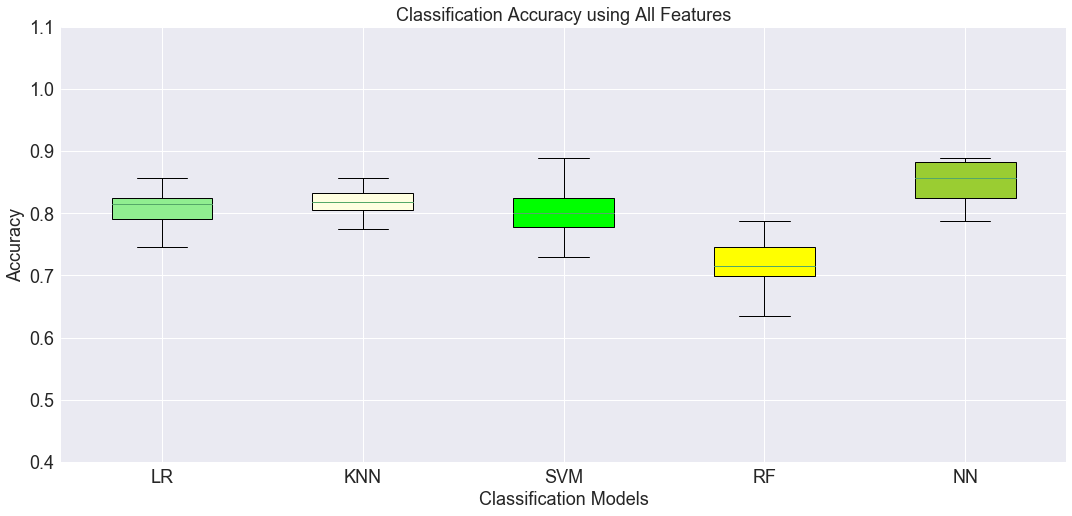

In [10]:
## BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF', 'NN'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

In [11]:
log_reg = LogisticRegression(C = .1)
log_reg.fit(X_train, y_train)
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.8218298555377207 
Test score: 0.7649253731343284


In [12]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.8218298555377207 
Test score: 0.7649253731343284


In [13]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.8218298555377207 
Test score: 0.7649253731343284


### Grid Search

In [ ]:
# Grid Search
from sklearn.grid_search import GridSearchCV

param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
classifiers = [{"clf":LogisticRegression(random_state=0), "param_grid":[{'C': param_range}]}, 
               {"clf":RandomForestClassifier(random_state=0), "param_grid":[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [10, 100, 1000]}]}
              ]

# 10x3 Nested Cross Validation  (algorithm comparison using the full feature set)
model_scores = []
for clf in classifiers:
    # Inner Cross Validation, searches for the best parameters
    gs = GridSearchCV(estimator=clf["clf"], param_grid=clf["param_grid"], scoring='accuracy', cv=3)
    # Outer Cross Validation, evaluates the model
    model_scores.append(cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10))

models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["LR", "Forest"])
models_df["Mean"] = models_df.mean(axis=1)
models_df

### Confusion Matrix


In [ ]:
#Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Survived", "Perished"]))